In [1]:
# !pip install opencv-python
%matplotlib inline
import cv2
import numpy as np
from skimage.io import imread, imshow
from skimage.draw import circle

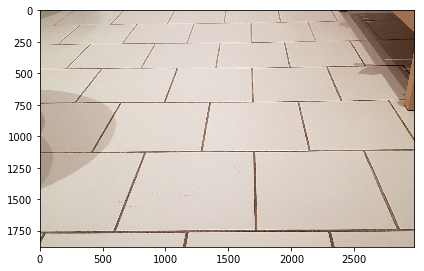

In [2]:
img_ = imread('test_cropped.jpg')
imshow(img_)

In [3]:
obj = [np.array([[-1, 0, 0], [-1, 1, 0], [0, 1, 0], [0, 0, 0], [2, 2, 0], [-3, 4, 0], [0, -1, 0], [1.5, -1, 0]]).astype('float32')]
img = [np.array([[413, 1123], [639, 728], [1347, 728], [1279, 1120], [2574, 437], [113, 116], [1166, 1757], [2841, 1742]]).astype('float32')]

xysize = (2976, 1880)

rms, camera_matrix, dist_coefs, rvecs, tvecs = cv2.calibrateCamera(obj, img, xysize, None, None)
R = cv2.Rodrigues(rvecs[0])[0]
t = tvecs[0]
P = np.concatenate([R, t], axis=1)
rms, camera_matrix, R, t, P

(3.1991459329753864, array([[3.58956564e+03, 0.00000000e+00, 1.58145571e+03],
        [0.00000000e+00, 4.54294313e+03, 4.50039916e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]), array([[ 0.99976874,  0.01764565, -0.01229178],
        [-0.00629143, -0.30657221, -0.95182661],
        [-0.02056391,  0.95168383, -0.30639029]]), array([[-0.34910724],
        [ 0.6102316 ],
        [ 4.11696144]]), array([[ 0.99976874,  0.01764565, -0.01229178, -0.34910724],
        [-0.00629143, -0.30657221, -0.95182661,  0.6102316 ],
        [-0.02056391,  0.95168383, -0.30639029,  4.11696144]]))

In [4]:
for i in range(len(obj[0])):
    
    x = np.dot(np.dot(camera_matrix, P), obj[0][i].tolist() + [1])
    x[0] /= x[2]
    x[1] /= x[2]
    x[2] /= x[2]
    print(obj[0][i], img[0][i], x)
    rr, cc = circle(x[0], x[1], 50)
    img_[cc, rr, 0] = 1

[-1.  0.  0.] [ 413. 1123.] [4.11220248e+02 1.12697330e+03 1.00000000e+00]
[-1.  1.  0.] [639. 728.] [642.50065616 726.72120603   1.        ]
[0. 1. 0.] [1347.  728.] [1.34671781e+03 7.22204821e+02 1.00000000e+00]
[0. 0. 0.] [1279. 1120.] [1.27707021e+03 1.12341213e+03 1.00000000e+00]
[2. 2. 0.] [2574.  437.] [2.59346515e+03 4.38266446e+02 1.00000000e+00]
[-3.  4.  0.] [113. 116.] [108.01592504 110.29838425   1.        ]
[ 0. -1.  0.] [1166. 1757.] [1.16554162e+03 1.76587633e+03 1.00000000e+00]
[ 1.5 -1.   0. ] [2841. 1742.] [2.87885826e+03 1.76514756e+03 1.00000000e+00]


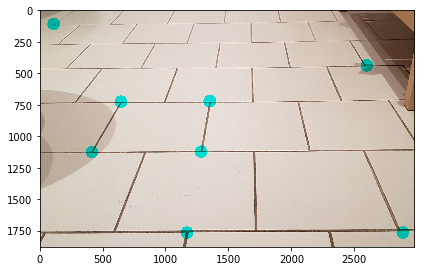

In [5]:
imshow(img_)

In [6]:
x = np.dot(np.dot(camera_matrix, P), [0.5, -1, 0, 1])
x[0] /= x[2]
x[1] /= x[2]
x[2] /= x[2]
x

array([1.73292476e+03, 1.76563499e+03, 1.00000000e+00])